In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
import math

### Question 1a

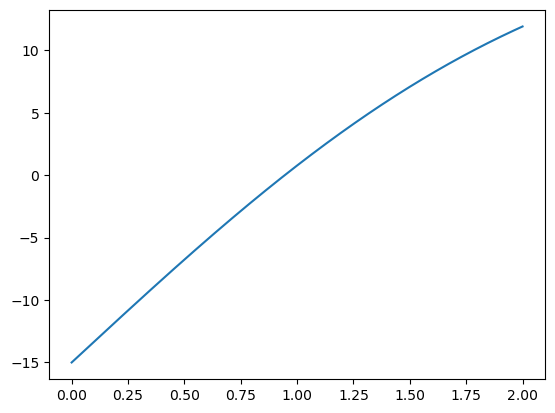

In [68]:
x = np.linspace(0, 2, 1000)
t = 5.2*10**6
alpha = 0.138*10**-6
c = 1/2*np.sqrt(alpha*t)
f = lambda x: -15 + 35*special.erf(x/2*(np.sqrt(alpha*t)))
fp = lambda x: 35*(2/np.sqrt(np.pi))*np.e**(-(c*x)**2)

plt.plot(x, f(x))
plt.show()

### Question 1b

In [69]:
def bisection(f,a,b,tol):
    
#    Inputs:
#     f,a,b       - function and endpoints of initial interval
#      tol  - bisection stops when interval length < tol

#    Returns:
#      astar - approximation of root
#      ier   - error message
#            - ier = 1 => Failed
#            - ier = 0 == success

#     first verify there is a root we can find in the interval 

    fa = f(a)
    fb = f(b);
    if (fa*fb>0):
        ier = 1
        astar = a
        return [astar, ier]

#   verify end points are not a root 
    if (fa == 0):
        astar = a
        ier =0
        return [astar, ier]

    if (fb == 0):
        astar = b
        ier = 0
        return [astar, ier]

    count = 0
    d = 0.5*(a+b)
    while (abs(d-a)> tol):
        fd = f(d)
        if (fd == 0):
            astar = d
            ier = 0
            return [astar, ier]
        if (fa*fd<0):
            b = d
        else: 
            a = d
            fa = fd
        d = 0.5*(a+b)
        count = count +1
        #print('abs(d-a) = ', abs(d-a))
        #print(d)
    print("Iterations:", count)
      
    astar = d
    ier = 0
    return [astar, ier]


def driver1b():

# use routines 
    t = 5.2*10**6
    alpha = 0.138*10**-6
    f = lambda x: -15 + 35*special.erf(x/2*(np.sqrt(alpha*t)))
    a = 0
    b = 1


    tol = 1e-13

    [astar,ier] = bisection(f,a,b,tol)
    print('the approximate root is',astar)
    print('the error message reads:',ier)
    print('f(astar) =', f(astar))
    
driver1b()

Iterations: 43
the approximate root is 0.9448240577650608
the error message reads: 0
f(astar) = 7.407408020299044e-13


### Question 1c

In [70]:
def driver1c():
    #f = lambda x: (x-2)**3
    #fp = lambda x: 3*(x-2)**2
    #p0 = 1.2
    f = lambda x: -15 + 35*special.erf(x/2*(np.sqrt(alpha*t)))
    fp = lambda x: 35*(2/np.sqrt(np.pi))*np.e**(-(c*x)**2)
    p0 = 1
    Nmax = 10000
    tol = 1e-13
    (p,pstar,info,it) = newton(f,fp,p0,tol, Nmax)
    print('the approximate root is', '%16.16e' % pstar)
    print('the error message reads:', '%d' % info)
    print('Number of iterations:', '%d' % it)
    
    
def newton(f,fp,p0,tol,Nmax):
    """
    Newton iteration.
    Inputs:
    f,fp - function and derivative
    p0 - initial guess for root
    tol - iteration stops when p_n,p_{n+1} are within tol
    Nmax - max number of iterations
    Returns:
    p - an array of the iterates
    pstar - the last iterate
    info - success message
    - 0 if we met tol
    - 1 if we hit Nmax iterations (fail)
    """
    p = np.zeros(Nmax+1);
    p[0] = p0
    for it in range(Nmax):
        p1 = p0-f(p0)/fp(p0)
        p[it+1] = p1
        if (abs(p1-p0) < tol):
            pstar = p1
            info = 0
            return [p,pstar,info,it]
        p0 = p1
    pstar = p1
    info = 1
    return [p,pstar,info,it]

driver1c()


the approximate root is 9.4482405776511169e-01
the error message reads: 0
Number of iterations: 48


### Question 4

In [71]:
def driver4():  
    
    x0 = 4
    

    f = lambda x: math.e**(3*x) - 27*x**6 + 27*x**4*math.e**(x) - 9*x**2*math.e**(2*x)
    fp = lambda x: 3*math.e**(3*x) - 162*x**5 + 108*x**3*math.e**(x) + 27*x**4*math.e**(x) - 18*x*math.e**(2*x) - 18*x**2*math.e**(2*x)
    fpp = lambda x: 9*math.e**(3*x) - 810*x**4 + 324*x**2*math.e**(x) + 216*x**3*math.e**(x) + 27*x**4*math.e**(x) - 18*math.e**(2*x) - 36*x*math.e**(2*x) - 72*x*math.e**(2*x) - 36*x**2*math.e**(2*x)

    
    h = lambda x: (math.e**(x) - 3*x**2)**3
    hp = lambda x: 3*((math.e**(x)-3*x**2)**2)*(math.e**(x) - 6*x)
    hpp = lambda x: 3*(math.e**(x) - 3*x**2)*(2*(math.e**(x) - 6*x) + (math.e**x - 3*x**2)*(math.e**(x) - 6))
    
    gii = lambda x: h(x)/hp(x)
    gpii = lambda x: 1 - h(x)*hpp(x)/(hp(x))**2
    
    giii = lambda x: x - 3*gii(x)
    gpiii = lambda x: 1 - 3*gpii(x)
    
    
    Nmax = 100
    tol = 1e-13
    
    (p,pstar,info,it) = newton(gii, gpii, x0, tol, Nmax)
    print('the approximate root is', '%16.16e' % pstar)
    print('the error message reads:', '%d' % info)
    print('Number of iterations:', '%d' % it)
    
    
driver4()




the approximate root is 3.7330790286329640e+00
the error message reads: 0
Number of iterations: 66


### Question 5a

Iteration	Newton Error	Secant Error
1		0.545628272251	0.118870967742
2		0.295738988239	0.055577768677
3		0.119970956109	0.017344169058
4		0.026538432773	0.002468449784
5		0.001353274171	0.000183191995
6		0.000269471656	0.000276354051
7		0.000275861500	0.000275861709
8		0.000275861598	0.000275861598
9		0.000275861598	0.000275861598
10		0.000275861598	0.000275861598


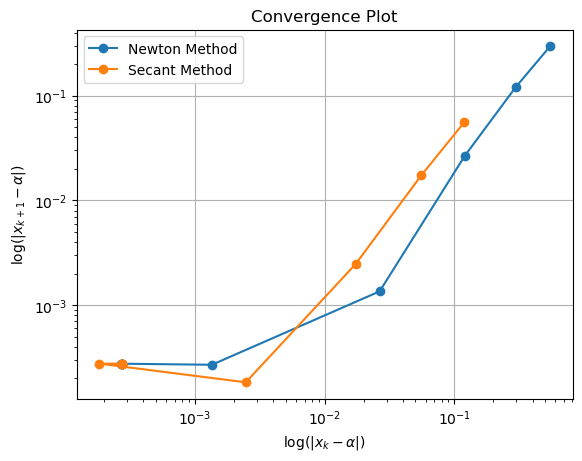

In [74]:
x0_newton = 2
errors_newton = []

x0_secant = 2
x1_secant = 1
errors_secant = []

f = lambda x: x**6 - x - 1
df = lambda x: 6*x**5 - 1

alpha = 1.135

for i in range(10):
    x_newton = x0_newton - f(x0_newton)/df(x0_newton)
    error_newton = abs(x_newton - alpha)
    errors_newton.append(error_newton)
    x0_newton = x_newton
    
    x_secant = x1_secant - f(x1_secant)*(x1_secant - x0_secant)/(f(x1_secant) - f(x0_secant))
    x0_secant, x1_secant = x1_secant, x_secant
    error_secant = abs(x1_secant - alpha)
    errors_secant.append(error_secant)
    
    
print("Iteration\tNewton Error\tSecant Error")
for i in range(len(errors_newton)):
    print(f'{i+1}\t\t{errors_newton[i]:.12f}\t{errors_secant[i]:.12f}')

    

    
    
plt.loglog(errors_newton[:-1], errors_newton[1:], marker = 'o', label = "Newton Method")
plt.loglog(errors_secant[:-1], errors_secant[1:], marker = 'o', label = "Secant Method")
plt.legend()
plt.grid(True)
plt.xlabel(r"log(|$x_{k} - \alpha$|)")
plt.ylabel(r"log(|$x_{k+1} - \alpha$|)")
plt.title('Convergence Plot')
plt.show()